In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Import the data into a Data Frame

In [31]:
df = pd.read_csv('Data/train.csv')
df2 = df.copy()

train=pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [28]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,percent_miss_val,sum_miss_val])),ignore_index=True)
    return miss_df

In [29]:
miss_df = find_missing_percent(df2)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")

print("Number of columns with missing values:"+(str(miss_df[miss_df['PercentMissing']>0.0].shape[0])))

,ColumnName,PercentMissing,TotalMissingVals
3,LotFrontage,17.74,259.0
6,Alley,93.77,1369.0
25,MasVnrType,0.55,8.0
26,MasVnrArea,0.55,8.0
30,BsmtQual,2.53,37.0
31,BsmtCond,2.53,37.0
32,BsmtExposure,2.60,38.0
33,BsmtFinType1,2.53,37.0
35,BsmtFinType2,2.60,38.0
42,Electrical,0.07,1.0




Number of columns with missing values:19


In [32]:
drop_cols = miss_df[miss_df['PercentMissing'] >70.0].ColumnName.tolist()

print("Number of columns with more than 70%:"+ str(len(drop_cols)))
train = train.drop(drop_cols,axis=1)
test = test.drop(drop_cols,axis =1)

miss_df = miss_df[miss_df['ColumnName'].isin(train.columns)]
'''Columns to Impute'''
impute_cols = miss_df[miss_df['TotalMissingVals']>0.0].ColumnName.tolist()
miss_df[miss_df['TotalMissingVals']>0.0]

Number of columns with more than 70%:4


,ColumnName,PercentMissing,TotalMissingVals
3,LotFrontage,17.74,259.0
25,MasVnrType,0.55,8.0
26,MasVnrArea,0.55,8.0
30,BsmtQual,2.53,37.0
31,BsmtCond,2.53,37.0
32,BsmtExposure,2.60,38.0
33,BsmtFinType1,2.53,37.0
35,BsmtFinType2,2.60,38.0
42,Electrical,0.07,1.0
57,FireplaceQu,47.26,690.0


In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [33]:
def plot_histogram(train, col1, col2, cols_list, last_one =False):
    """
    Plot the histogram for the numerical columns. The bin width
    is calculated by Freedman Diaconis Rule and Sturges rule.
    
    Freedman-Diaconis Rule:
    Freedman-Diaconis Rule is a rule to find the optimal number of bins.
    Bin width: (2 * IQR)/(N^1/3)
    N - Size of the data
    Number of bins : (Range/ bin-width)
    
    Disadvantage: The IQR might be zero for certain columns. In
    that case the bin width might be equal to infinity. In that case 
    the actual range of the data is returned as bin width.
    
    Sturges Rule:
    Sturges Rule is a rule to find the optimal number of bins.
    Bin width: (Range/ bin-width)
    N - Size of the data
    Number of bins : ceil(log2(N))+1
    
    """
    if(col1 in cols_list):
        freq1, bin_edges1 = np.histogram(train[col1],bins='sturges')
    else:
        freq1, bin_edges1 = np.histogram(train[col1],bins='fd')
    if(col2 in cols_list):
        freq2, bin_edges2 = np.histogram(train[col2],bins='sturges')
    else:
        freq2, bin_edges2 = np.histogram(train[col2],bins='fd')
        
    if(last_one!=True):
        plt.figure(figsize=(45,18))  
        ax1 = plt.subplot(1,2,1)
        ax1.set_title(col1,fontsize=45)
        ax1.set_xlabel(col1,fontsize=40)
        ax1.set_ylabel('Frequency',fontsize=40)
        train[col1].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)
        
    else:
        plt.figure(figsize=(20,10))
        ax1 = plt.subplot(1,2,1)
        ax1.set_title(col1,fontsize=25)
        ax1.set_xlabel(col1,fontsize=20)
        ax1.set_ylabel('Frequency',fontsize=20)
        train[col1].hist(bins=bin_edges1,ax = ax1, xlabelsize=15, ylabelsize=15)
    
    if(last_one != True):
        ax2 = plt.subplot(1,2,2)
        ax2.set_title(col2,fontsize=45)
        ax2.set_xlabel(col2,fontsize=40)
        ax2.set_ylabel('Frequency',fontsize=40)
        train[col2].hist(bins=bin_edges2, ax = ax2, xlabelsize=30, ylabelsize=30)

In [35]:
numeric_cols = train.select_dtypes(['float','int']).columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A7F44BA8>],
      dtype=object)

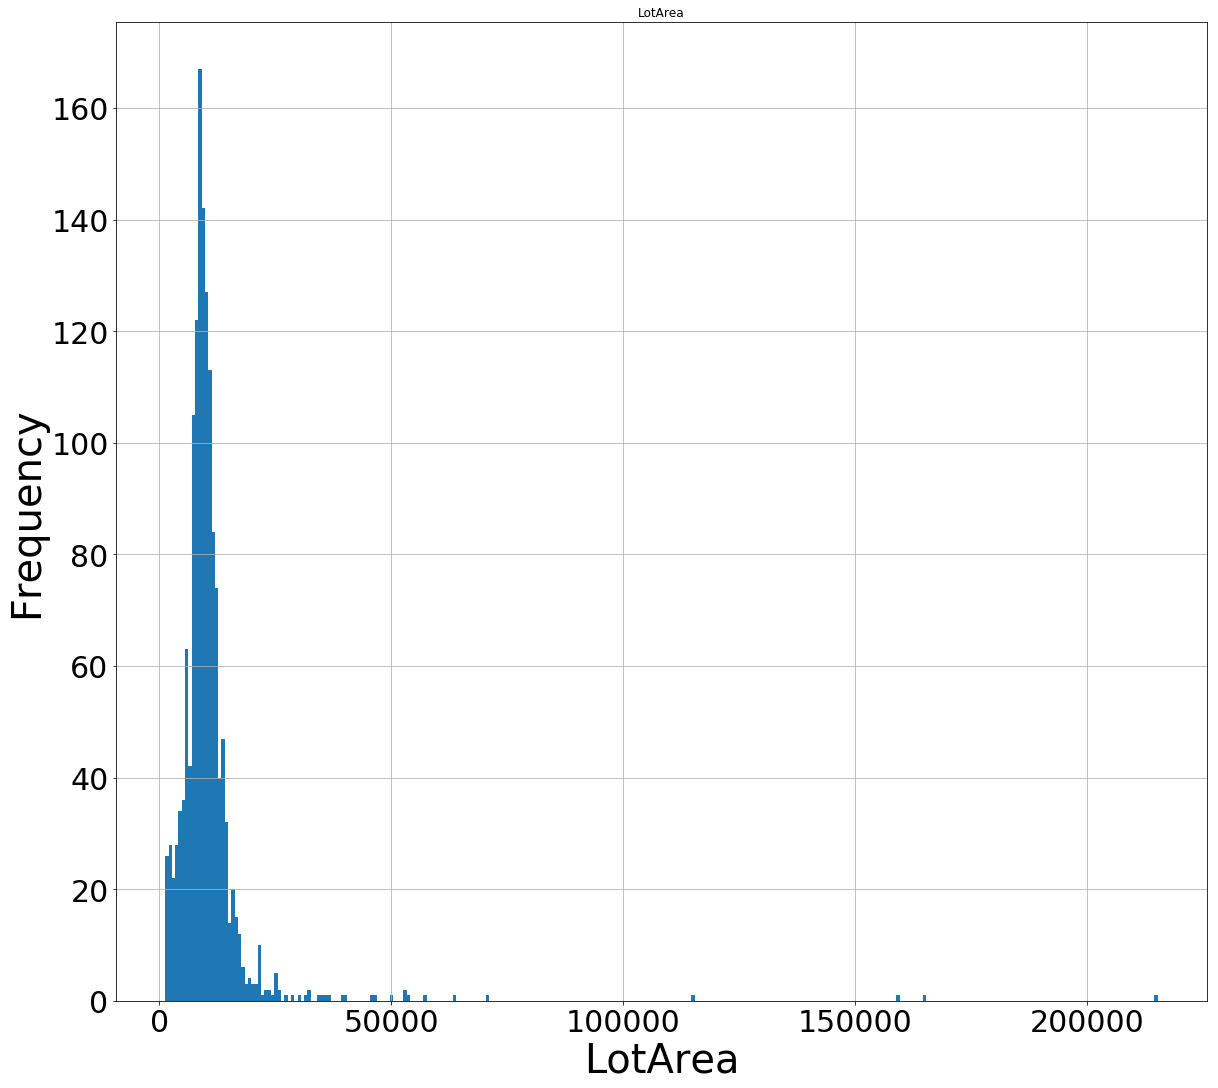

In [45]:
freq1, bin_edges1=np.histogram(df3.LotArea, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('LotArea',fontsize=45)
ax1.set_xlabel('LotArea',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['LotArea']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A67EF7B8>],
      dtype=object)

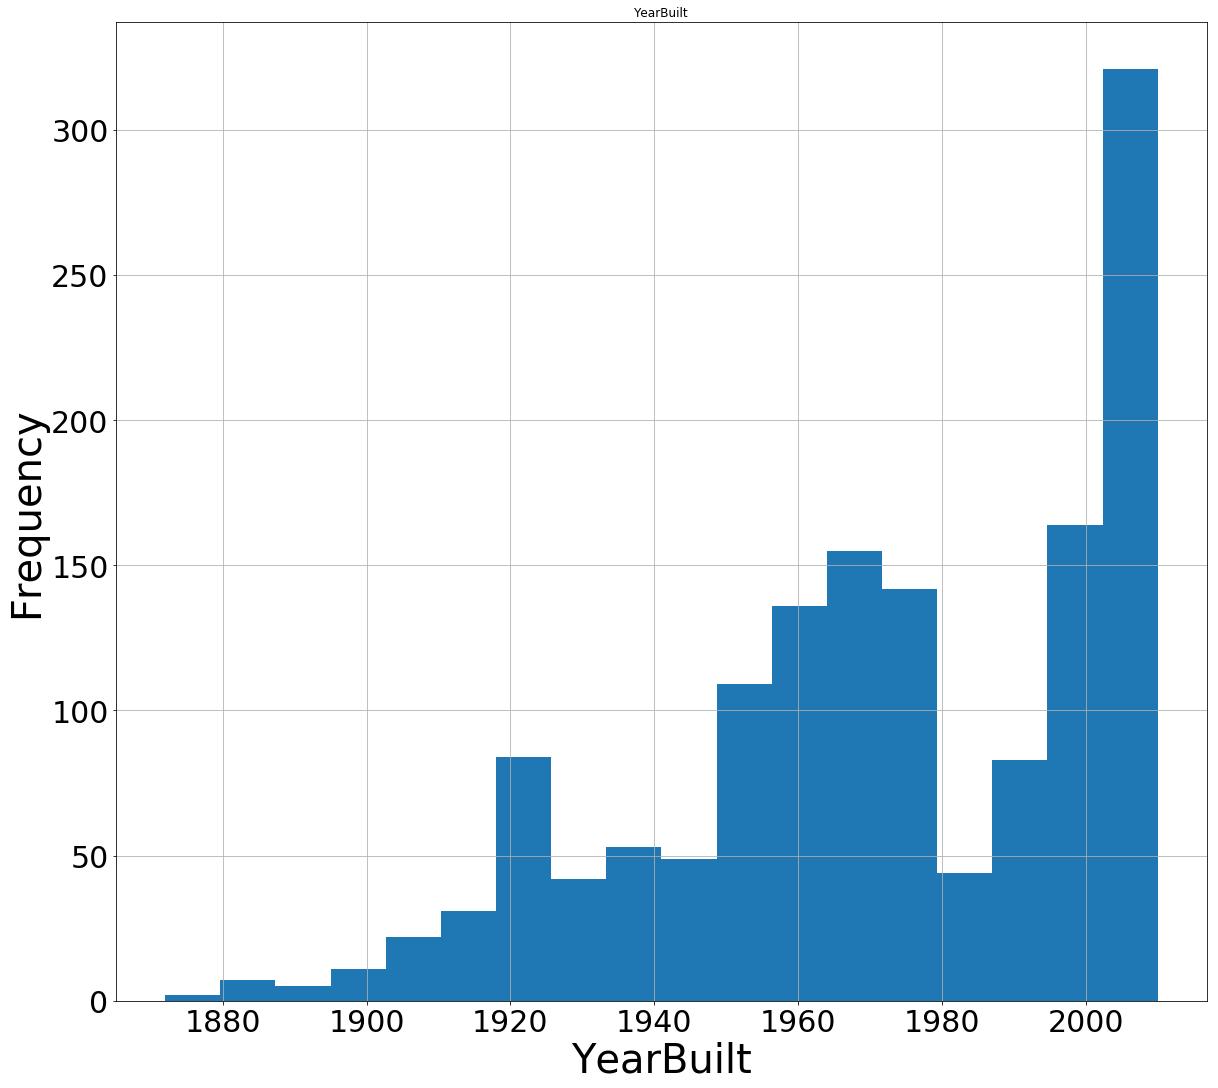

In [46]:
freq1, bin_edges1=np.histogram(df3.YearBuilt, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('YearBuilt',fontsize=45)
ax1.set_xlabel('YearBuilt',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['YearBuilt']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A79BA400>],
      dtype=object)

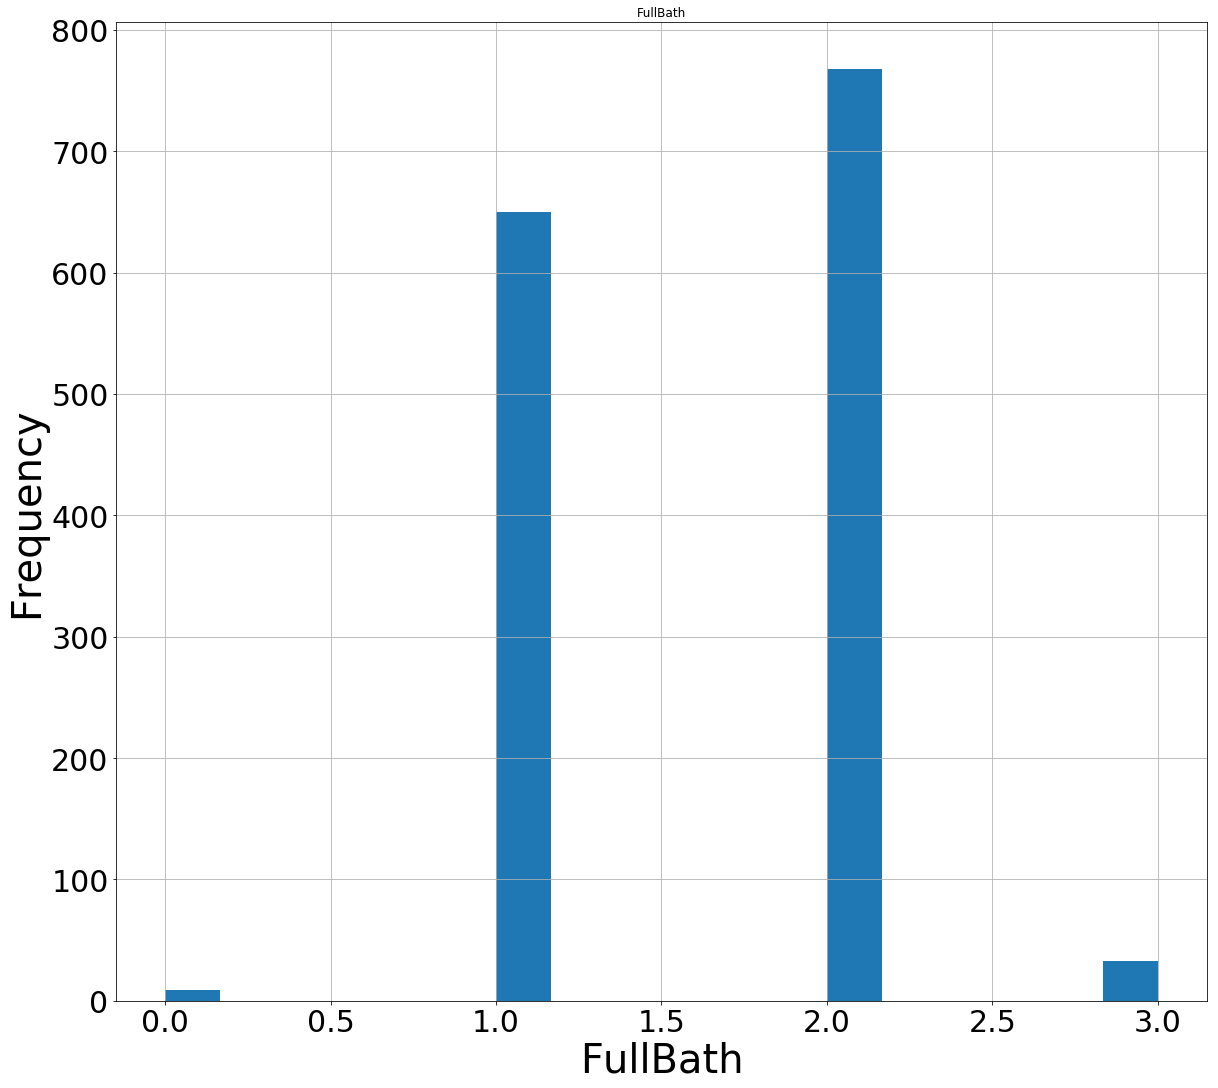

In [47]:
freq1, bin_edges1=np.histogram(df3.FullBath, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('FullBath',fontsize=45)
ax1.set_xlabel('FullBath',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['FullBath']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A67EF160>],
      dtype=object)

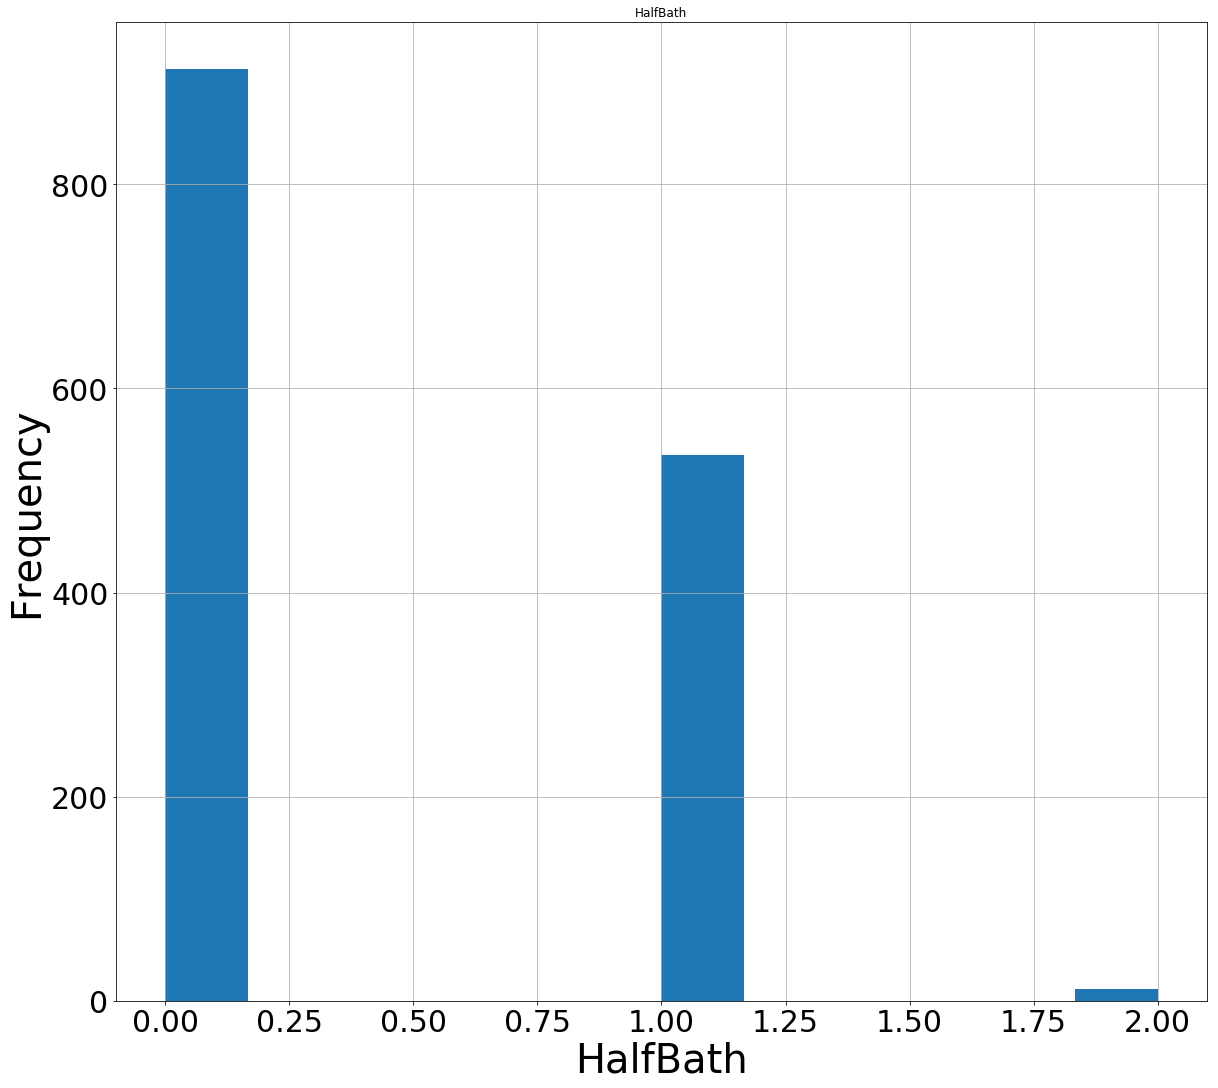

In [48]:
freq1, bin_edges1=np.histogram(df3.HalfBath, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('HalfBath',fontsize=45)
ax1.set_xlabel('HalfBath',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['HalfBath']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A868D898>],
      dtype=object)

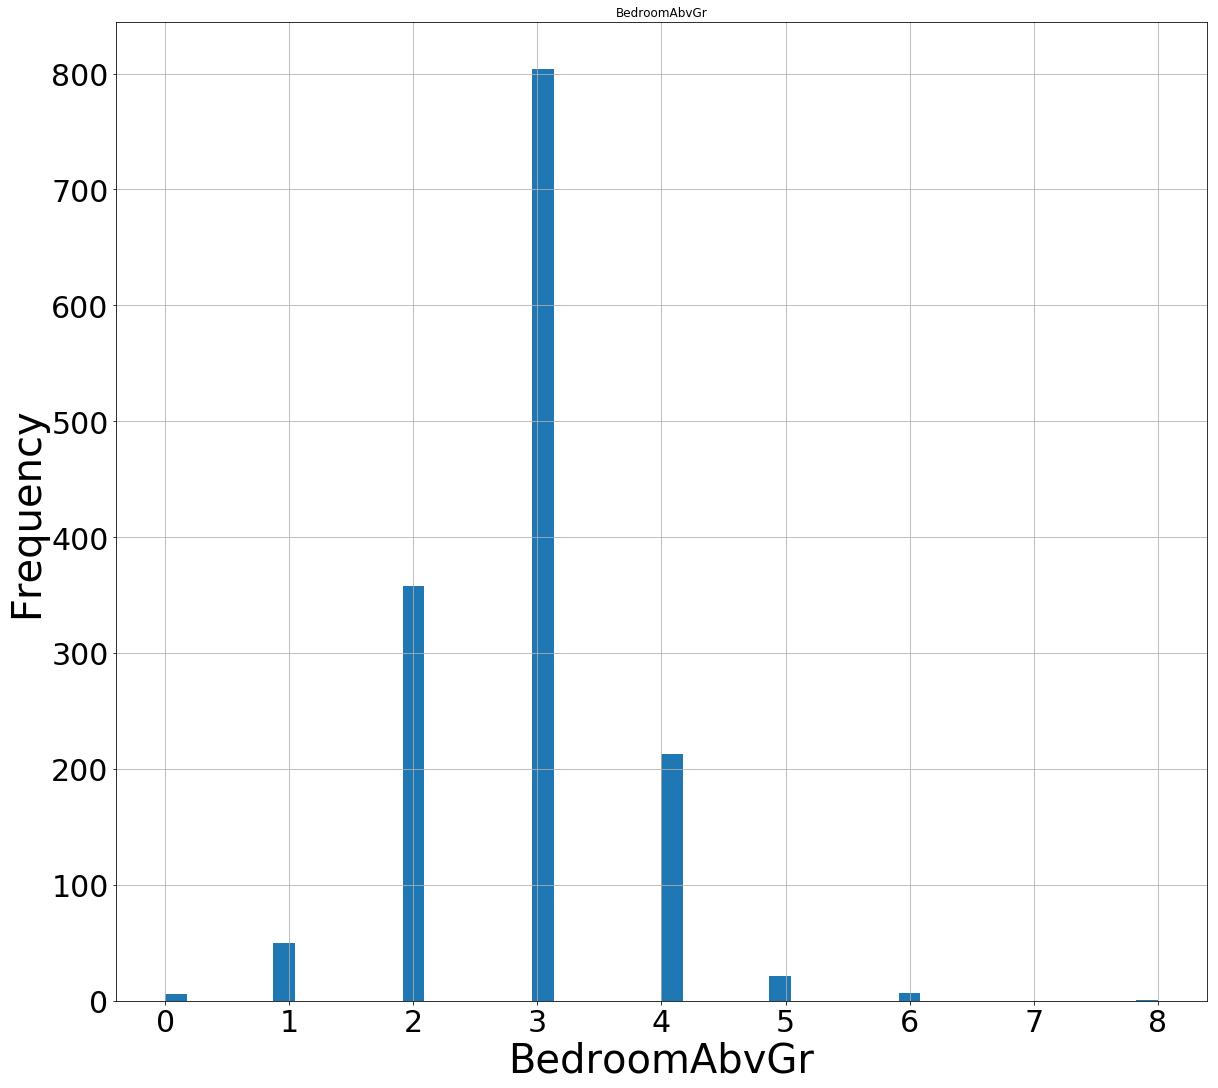

In [49]:
freq1, bin_edges1=np.histogram(df3.BedroomAbvGr, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('BedroomAbvGr',fontsize=45)
ax1.set_xlabel('BedroomAbvGr',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['BedroomAbvGr']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7A8726DA0>],
      dtype=object)

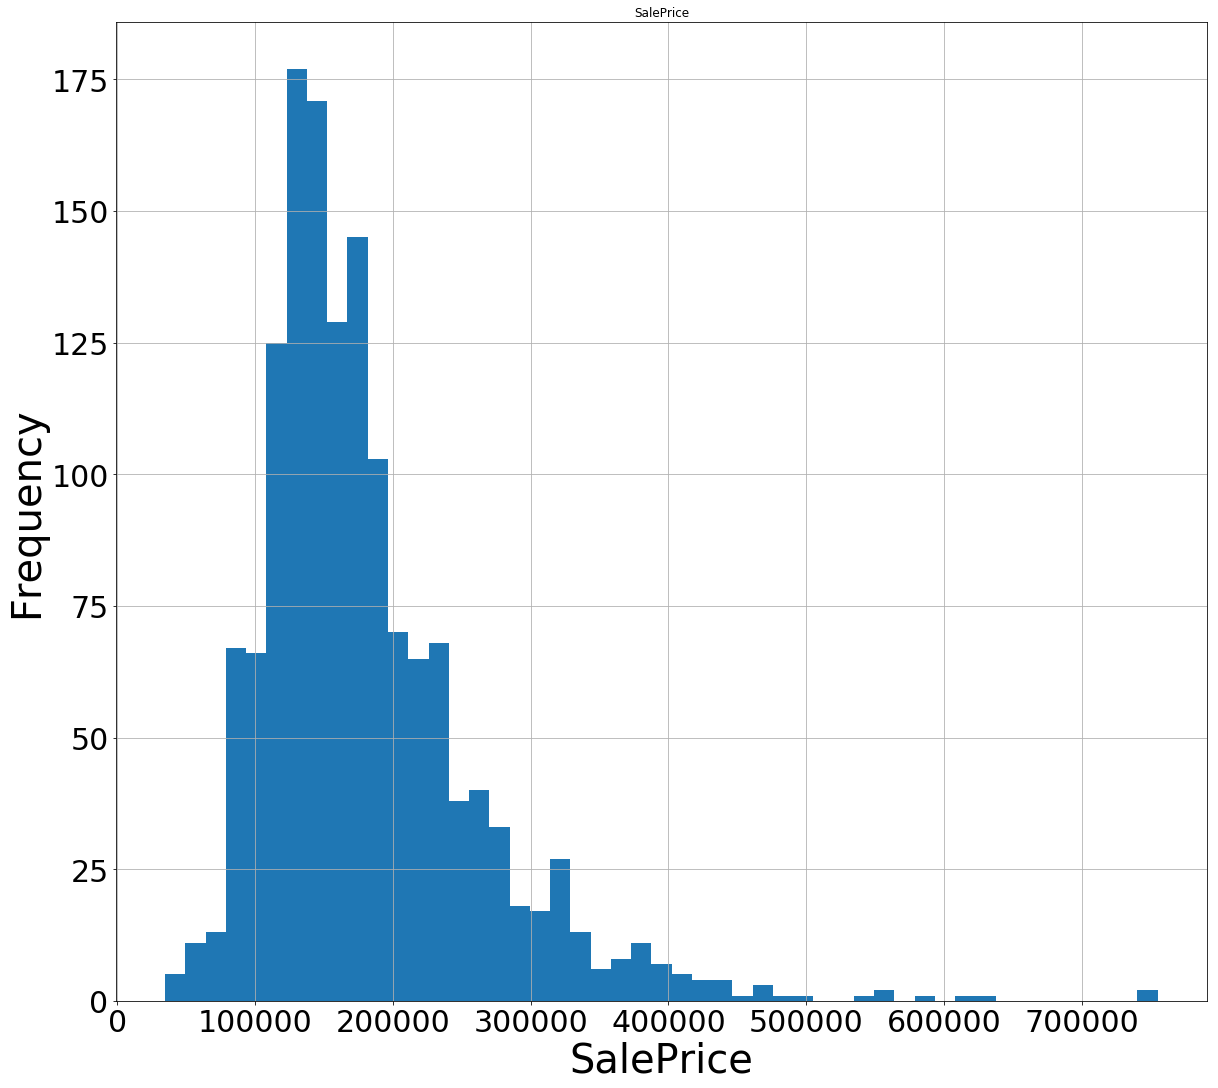

In [51]:
freq1, bin_edges1=np.histogram(train.SalePrice, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('SalePrice',fontsize=45)
ax1.set_xlabel('SalePrice',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['SalePrice']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

In [52]:
df3=df[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr']].copy()

In [53]:
df3.describe()

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1.565068,0.382877,2.866438
std,9981.264932,30.202904,0.550916,0.502885,0.815778
min,1300.000000,1872.000000,0.000000,0.000000,0.000000
25%,7553.500000,1954.000000,1.000000,0.000000,2.000000
50%,9478.500000,1973.000000,2.000000,0.000000,3.000000
75%,11601.500000,2000.000000,2.000000,1.000000,3.000000
max,215245.000000,2010.000000,3.000000,2.000000,8.000000


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
LotArea         1460 non-null int64
BldgType        1460 non-null object
HouseStyle      1460 non-null object
YearBuilt       1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
dtypes: int64(5), object(2)
memory usage: 79.9+ KB


In [17]:
df3.isnull().sum()

LotArea         0
BldgType        0
HouseStyle      0
YearBuilt       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [18]:
df3.corr()

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr
LotArea,1.000000,0.014228,0.126031,0.014259,0.119690
YearBuilt,0.014228,1.000000,0.468271,0.242656,-0.070651
FullBath,0.126031,0.468271,1.000000,0.136381,0.363252
HalfBath,0.014259,0.242656,0.136381,1.000000,0.226651
BedroomAbvGr,0.119690,-0.070651,0.363252,0.226651,1.000000


In [19]:
df3.head()

,LotArea,BldgType,HouseStyle,YearBuilt,FullBath,HalfBath,BedroomAbvGr
0,8450,1Fam,2Story,2003,2,1,3
1,9600,1Fam,1Story,1976,2,0,3
2,11250,1Fam,2Story,2001,2,1,3
3,9550,1Fam,2Story,1915,1,0,3
4,14260,1Fam,2Story,2000,2,1,4


In [20]:
one_hot_df = pd.get_dummies(df3[['BldgType','HouseStyle']]) #
df3 = df3.drop(['BldgType','HouseStyle'], axis=1) # Drop column as it is now encoded
df3 = df3.join(one_hot_df) # Join the encoded df
print(df3.columns)
df3.tail()
# and encoding happens

Index(['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl'],
      dtype='object')


,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
1455,7917,1999,2,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0
1456,13175,1978,2,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
1457,9042,1941,2,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0
1458,9717,1950,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0
1459,9937,1965,1,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0


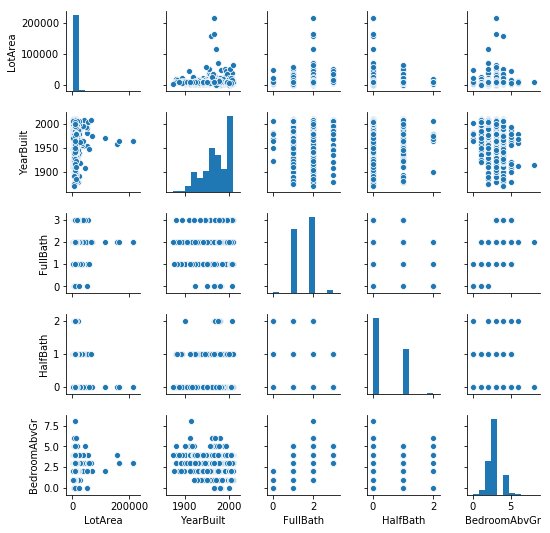

In [21]:
sns.pairplot(df3[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath',
       'BedroomAbvGr']], height=1.5)

In [22]:
# split data into X and Y dataframes
X = df3.copy() # independent variables
Y = df2['SalePrice'].copy() # dependent variable

In [23]:
# Run regression using statsmodels
import statsmodels.api as sm
import math

X = sm.add_constant(X) # required if a value for alpha is expected
est = sm.OLS(Y,X).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     95.22
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          3.11e-212
Time:                        19:25:21   Log-Likelihood:                -18018.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1443   BIC:                         3.616e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.222e+06   1.04e+0